<a href="https://colab.research.google.com/github/slovak194/6dof_ctrl/blob/master/6dof_analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%cd 6dof_ctrl
%pwd
!git pull

[Errno 2] No such file or directory: '6dof_ctrl'
/content/6dof_ctrl
Already up to date.


In [0]:
import sys

!{sys.executable} -m pip install xmltodict
!{sys.executable} -m pip install numpy-quaternion

In [0]:
%run -i 'motion_model.py'

<Figure size 1200x600 with 0 Axes>

In [0]:
who

A	 An	 Ann	 S	 T_sc	 T_st	 U	 V_c	 Vh	 
adjtf	 adv	 g_urdf_file_path	 get_ftz_from_F_c	 get_get_dV_c_from_target_T	 get_get_ftz_from_F_c	 get_get_ftz_from_V_c_dV_c	 get_pose_control	 get_robot	 
get_robot_parameters	 item	 mpl	 np	 plt	 pprint	 q_s_cog	 q_s_target	 q_sc	 
q_st	 robot	 round_expr	 rprint	 sgen	 sophus	 sp	 sys	 t_sc	 
t_st	 v_c	 w_c	 


In [0]:
Ann = np.where(np.abs(An)<=1e-10, 0, An)
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})
Ann

array([[-0.019327, 0.019327, -0.016939, 0.016939, -0.110000, 0.110000],
       [0.022945, 0.022945, -0.024760, -0.024760, 0.000000, 0.000000],
       [0.168484, -0.168484, -0.175483, 0.175483, 0.000000, 0.000000],
       [0.764842, 0.764842, -0.825336, -0.825336, 0.000000, 0.000000],
       [0.644218, -0.644218, 0.564642, -0.564642, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000]])

In [0]:
U, S, Vh = np.linalg.svd(Ann)

print(U)

U @ np.diag(S)


[[-0.000000 0.000000 -0.030485 -0.000528 -0.999535 0.000000]
 [0.029987 0.000000 -0.000000 0.000000 0.000000 0.999550]
 [0.000000 0.000000 0.014003 -0.999902 0.000101 0.000000]
 [0.999550 0.000000 -0.000000 0.000000 0.000000 -0.029987]
 [0.000000 0.000000 0.999437 0.013993 -0.030490 0.000000]
 [0.000000 1.000000 0.000000 0.000000 0.000000 0.000000]]


array([[-0.000000, 0.000000, -0.036952, -0.000181, -0.155420, 0.000000],
       [0.047740, 0.000000, -0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.016974, -0.343620, 0.000016, 0.000000],
       [1.591328, 0.000000, -0.000000, 0.000000, 0.000000, -0.000000],
       [0.000000, 0.000000, 1.211458, 0.004809, -0.004741, 0.000000],
       [0.000000, 1.414214, 0.000000, 0.000000, 0.000000, 0.000000]])

motion_model.py:32: RuntimeWarning:

divide by zero encountered in log



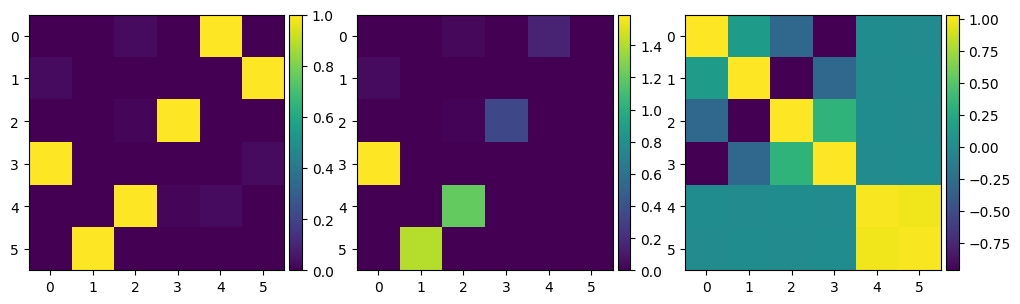

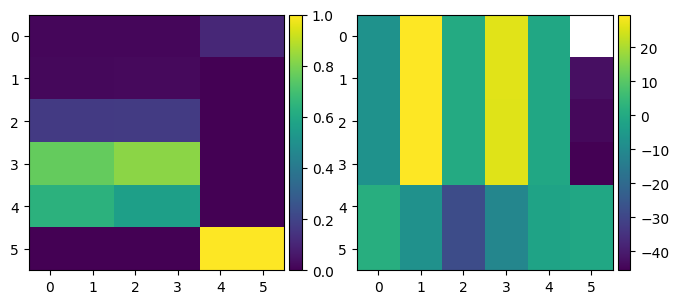

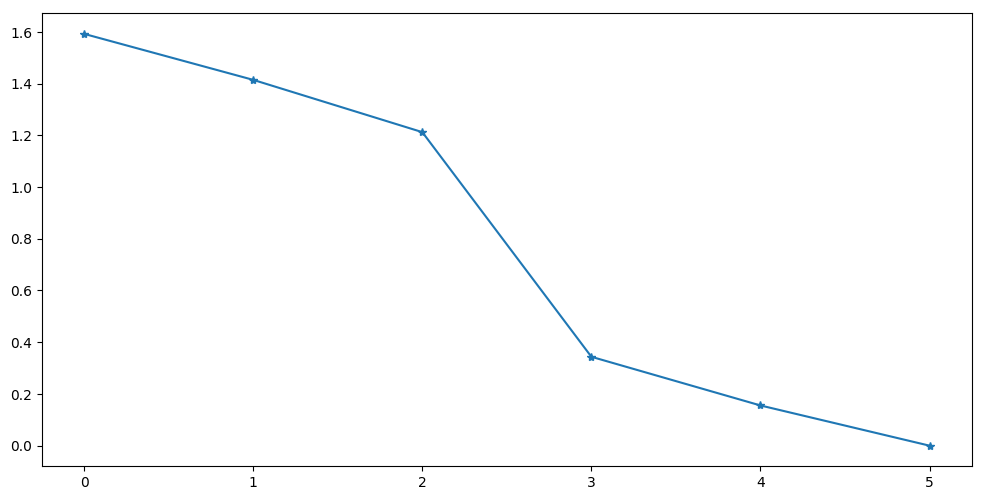

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['figure.dpi']= 100
plt.rcParams['figure.figsize'] = [12, 6]

plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(abs(U))
plt.colorbar(cax=make_axes_locatable(plt.gca()).append_axes("right", size="5%", pad=0.05))

plt.subplot(1, 3, 2)
plt.imshow(abs(U @ np.diag(S)))
plt.colorbar(cax=make_axes_locatable(plt.gca()).append_axes("right", size="5%", pad=0.05))

plt.subplot(1, 3, 3)
plt.imshow(Ann.T @ Ann)
plt.colorbar(cax=make_axes_locatable(plt.gca()).append_axes("right", size="5%", pad=0.05))

plt.figure()

plt.rcParams['figure.figsize'] = [12, 6]

plt.subplot(1, 3, 1)
plt.imshow(abs(Ann))
plt.colorbar(cax=make_axes_locatable(plt.gca()).append_axes("right", size="5%", pad=0.05))

plt.subplot(1, 3, 2)
plt.imshow(np.log(abs(np.linalg.pinv(Ann))))
plt.colorbar(cax=make_axes_locatable(plt.gca()).append_axes("right", size="5%", pad=0.05))

plt.figure()
plt.plot(S, '*-')



In [0]:
print(np.linalg.pinv(Ann) @ np.eye(6))

[[0.000802 7299259044664.765625 1.359474 -218977771333.448608 0.421596 0.000000]
 [0.000802 7299259044663.296875 -1.352771 -218977771333.404541 -0.421334 -0.000000]
 [0.000744 6764255840200.082031 -1.544136 -202927675200.589905 0.404776 0.000000]
 [0.000744 6764255840197.669922 1.550347 -202927675200.517548 -0.404533 -0.000000]
 [-4.545455 -0.000555 0.000000 0.000017 -0.136364 0.500000]
 [4.545455 0.000549 -0.000000 -0.000016 0.136364 0.500000]]


In [0]:
l_robot = get_robot("../bluerov_ffg/urdf/brov2_original.urdf")

In [0]:
robot

In [0]:
!whoami

root
